In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Librerias
import os
from pandas import read_csv
%matplotlib inline

import numpy as np
import pandas as pd
#graficas
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# directorios (path) de entrada:
path_in="/content/drive/MyDrive/Maestria/Proyecto Integrador 2/Modelos Finales/Data Set 2 corporate_rating_exo.csv"
data = pd.read_csv(path_in,delimiter=',' )
data.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,Federal Funds Rate,US GDP Growth Rate,US CPI,US Unemployment Rate,Variación anual Sector
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2015-11-27,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.049351,7.057088,15.565438,0.058638,3.906655,0.110833,2.0,236.252,5.6,-0.145008
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2014-02-13,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.048857,6.460618,15.914250,0.067239,4.002846,0.098333,3.5,234.719,6.7,0.020161
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,2015-03-06,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.044334,10.491970,18.888889,0.074426,3.483510,0.110833,2.0,236.252,5.6,-0.145008
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,2012-06-15,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,-0.012858,4.080741,6.901042,0.028394,4.581150,0.120833,4.6,227.223,8.5,0.089855
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,2016-10-24,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.053770,8.293505,15.808147,0.058065,3.857790,0.263750,0.7,237.761,5.0,0.195543


In [ ]:
data.Rating.value_counts()

BBB    671
BB     490
A      398
B      302
AA      89
CCC     64
AAA      7
CC       5
C        2
D        1
Name: Rating, dtype: int64

Observamos que el conjunto de datos está muy desequilibrado. Tenemos 671 BBB pero solo 1 D. Sin embargo, estamos trabajando con calificaciones de diferentes compañías como Moody's, Standard & Poor's y más. Se decide simplificar las etiquetas, de acuerdo con el riesgo de clasificación.

In [ ]:
rating_dict = {'AAA':'Lowest Risk',
               'AA':'Low Risk',
               'A':'Low Risk',
               'BBB':'Medium Risk',
               'BB':'High Risk',
               'B':'High Risk',
               'CCC':'Highest Risk',
               'CC':'Highest Risk',
               'C':'Highest Risk',
               'D':'In Default'}

data.Rating = data.Rating.map(rating_dict)

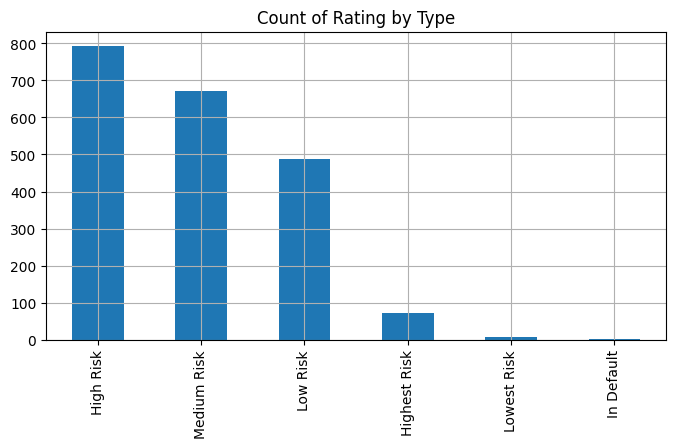

In [ ]:
ax = data['Rating'].value_counts().plot(kind='bar',
                                             figsize=(8,4),
                                             title="Count of Rating by Type",
                                             grid=True)

Pasamos de 10 etiquetas a 6 etiquetas

Sin embargo, persiste  la falta de Calificaciones Crediticias clasificadas como de Menor Riesgo y En Default tendremos que eliminarlas de la tabla. Sin embargo, el conjunto de datos se mantendrá desequilibrado y, si es necesario, tendremos que abordar este problema en pasos posteriores.

In [ ]:
data = data[data['Rating']!='Lowest Risk'] # filter Lowest Risk
data = data[data['Rating']!='In Default']  # filter In Default
data.reset_index(inplace = True, drop=True) # reset index

In [ ]:
# Estadisticos Basicos
data.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,Federal Funds Rate,US GDP Growth Rate,US CPI,US Unemployment Rate,Variación anual Sector
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,2.021000e+03,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,3.535411,2.657150,0.669048,334.855415,0.278725,0.432721,0.496900,0.588793,-37.666843,-74.267283,...,0.438715,48.426558,6.540891e+03,1.452142,38.138233,0.147028,2.248095,233.345537,6.670905,0.067018
std,44.139386,33.009920,3.590902,4456.606352,6.076128,9.002733,0.525996,11.246798,1168.476782,2354.920503,...,9.002047,530.161001,1.778797e+05,19.521704,760.421855,0.080574,1.529972,4.558714,1.388950,0.156324
min,-0.932005,-1.893266,-0.192736,-811.845623,-101.845815,-124.343612,-14.800817,-124.343612,-40213.178290,-87162.162160,...,-124.343612,-3749.921337,-1.195049e+04,-4.461837,-76.662850,0.098333,-8.500000,191.700000,5.000000,-0.241552
25%,1.071930,0.602298,0.131433,22.806507,0.020894,0.025649,0.232565,0.044546,0.018757,0.028112,...,0.028057,6.235759,2.348851e+00,0.073664,2.202394,0.110833,0.700000,231.221000,5.600000,0.007772
50%,1.492804,0.979094,0.297859,42.281804,0.064323,0.084965,0.414217,0.107640,0.045417,0.074639,...,0.087424,9.269746,4.361649e+00,0.132758,5.775840,0.120833,2.000000,234.719000,6.700000,0.058543
75%,2.160710,1.450457,0.625355,59.165369,0.113871,0.144763,0.849693,0.175334,0.077159,0.135036,...,0.149355,12.898855,7.322553e+00,0.239359,9.500424,0.123750,3.500000,236.252000,7.900000,0.121537
max,1725.505005,1139.541703,125.917417,115961.637400,198.517873,309.694856,2.702533,410.182214,0.487826,2.439504,...,309.694856,11153.607090,6.439270e+06,688.526591,20314.880400,2.281250,4.600000,237.761000,9.900000,0.757353


Observamos mucha asimetría en los datos con esta primera exploración. En este caso, significa que la mayoría de las variables del conjunto de datos pueden tener una fuerte presencia de valores atípicos. Tomando como observación la tabla sobre la primera columna:

currentRatio: Este 50% de sus variables entre 1.071 y 2.16. El valor mínimo es -0.932005, sin embargo, el valor máximo es 1725. El mismo patrón El mismo patrón se puede observar en columnas, como quickRatio, cashRatio, daysOfSalesOutstanding, netProfitMargin, etc.

In [ ]:
# Matriz de correlación para entender las relaciones entre variables numéricas
correlacion = data.corr()

# Crear una lista para almacenar las columnas a eliminar
columns_to_drop = []

# Iterar sobre la matriz de correlación
for i in range(len(correlacion.columns)):
    for j in range(i+1, len(correlacion.columns)):
        if abs(correlacion.iloc[i, j]) >= 0.95:
            column_name = correlacion.columns[j]
            columns_to_drop.append(column_name)

# Eliminar las columnas del DataFrame
data.drop(columns=columns_to_drop, inplace=True)

<ipython-input-9-d4a4795f6956>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = data.corr()


Correlacion entre Variables

<ipython-input-10-b626fbf685c5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


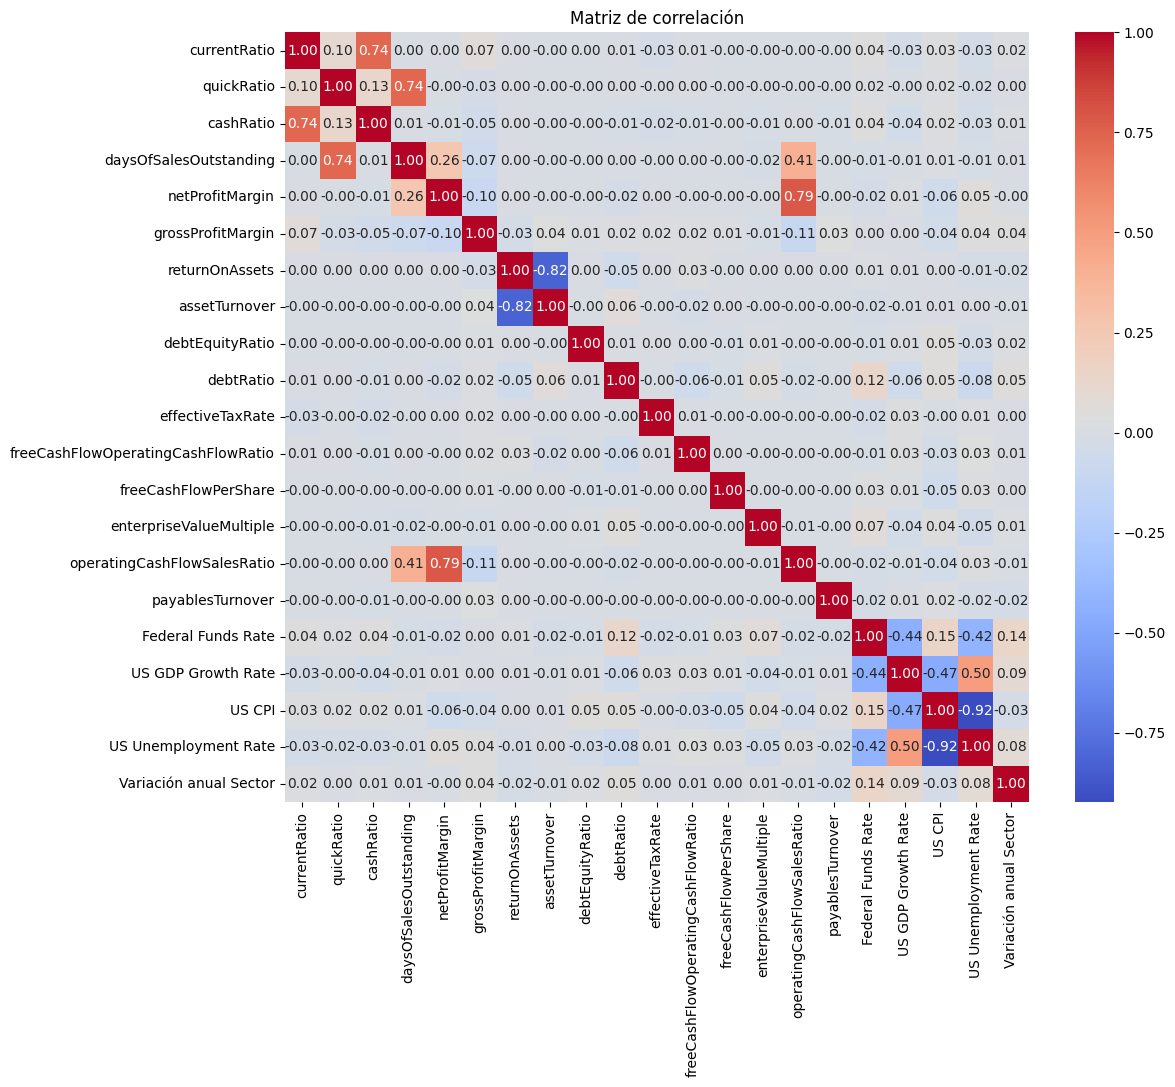

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()

Modelos de Machine Learning

En los siguientes pasos realizaremos lo siguiente:

Preparar el conjunto de datos
Dividir en el entrenamiento y la prueba
Transformar/Codificar las etiquetas kand de las características
Pruebe una amplia gama de modelos de ML (basados en árboles, probabilísticos, etc.).
Compara el accuracry de todos los modelos.
Elija nuestro modelo ganador y ajuste los hiperparámetros para obtener una mayor precisión.
Realiza una evaluación más profunda del resultado con una matriz de confusión y diferentes medidas.
Identifique las características más importantes para predecir la calificación.

Preparacion del Data SET

In [ ]:
from sklearn import preprocessing

In [ ]:
#codificar las variables categóricas en tu conjunto de datos
le = preprocessing.LabelEncoder()
le.fit(data.Sector)
data.Sector = le.transform(data.Sector) # encode sector
le.fit(data.Rating)
data.Rating = le.transform(data.Rating) # encode rating

Se depuran variables por correlacion y se hace un PCA

In [ ]:
#Seleccion de variables numericas para el PCA
# Identificar las columnas numéricas
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Imprimir las columnas numéricas
print("Columnas Numéricas:")
print(numeric_columns)

Columnas Numéricas:
Index(['Rating', 'Sector', 'currentRatio', 'quickRatio', 'cashRatio',
       'daysOfSalesOutstanding', 'netProfitMargin', 'grossProfitMargin',
       'returnOnAssets', 'assetTurnover', 'debtEquityRatio', 'debtRatio',
       'effectiveTaxRate', 'freeCashFlowOperatingCashFlowRatio',
       'freeCashFlowPerShare', 'enterpriseValueMultiple',
       'operatingCashFlowSalesRatio', 'payablesTurnover', 'Federal Funds Rate',
       'US GDP Growth Rate', 'US CPI', 'US Unemployment Rate',
       'Variación anual Sector'],
      dtype='object')


In [ ]:
# Seleccionar solo las columnas numéricas (variables financieras)
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# O puedes seleccionar específicamente las columnas que deseas incluir en el PCA
selected_columns = ['Sector', 'currentRatio', 'quickRatio', 'cashRatio',
       'daysOfSalesOutstanding', 'netProfitMargin', 'grossProfitMargin',
       'returnOnAssets', 'assetTurnover', 'debtEquityRatio', 'debtRatio',
       'effectiveTaxRate', 'freeCashFlowOperatingCashFlowRatio',
       'freeCashFlowPerShare', 'enterpriseValueMultiple',
       'operatingCashFlowSalesRatio', 'payablesTurnover', 'Federal Funds Rate',
       'US GDP Growth Rate', 'US CPI', 'US Unemployment Rate',
       'Variación anual Sector']
numeric_data = data[selected_columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [ ]:
from sklearn.decomposition import PCA

from sklearn.decomposition import PCA

# Inicializar PCA sin especificar el número de componentes
pca = PCA()

# Aplicar PCA a los datos escalados
principal_components = pca.fit_transform(scaled_data)

# Calcular la varianza explicada acumulativa
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Determinar el número de componentes para conservar el 90% de la variabilidad
n_components = sum(cumulative_variance_ratio < 0.90) + 1

# Imprimir el número de componentes necesarios
print(f"Se necesitan {n_components} componentes principales para conservar el 90% de la variabilidad.")

# Inicializar y aplicar PCA con el número determinado de componentes
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

# Crear un DataFrame con los componentes principales
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

Se necesitan 15 componentes principales para conservar el 90% de la variabilidad.


Varianza explicada por cada componente principal: [0.11611261 0.09819691 0.08410472 0.0803051  0.06522657 0.05850432
 0.05220488 0.04734254 0.04650491 0.04531923 0.04508165 0.04477766
 0.0430848  0.04117207 0.03800234]


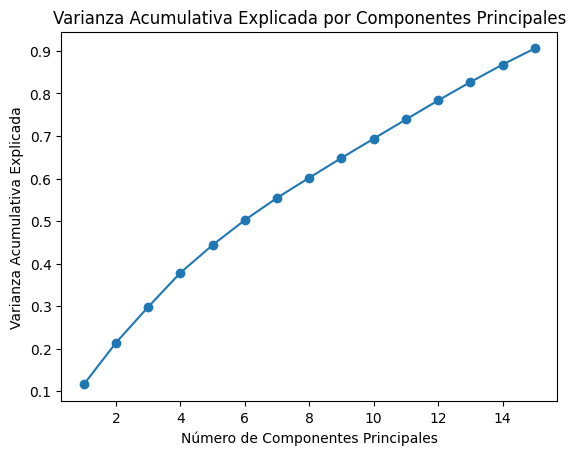

In [ ]:
import matplotlib.pyplot as plt

# Visualizar la varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:", explained_variance_ratio)

# Graficar el porcentaje de varianza explicada acumulativa
cumulative_variance_ratio = explained_variance_ratio.cumsum()
plt.plot(range(1, n_components + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulativa Explicada')
plt.title('Varianza Acumulativa Explicada por Componentes Principales')
plt.show()


In [ ]:
# Integrar los componentes principales con las columnas no incluidas en el PCA
data_pca = pd.concat([data[['Rating']], principal_df], axis=1)

# Ahora puedes usar final_data para construir tus modelos de Machine Learning


In [ ]:
# Obtiene los nombres de las columnas
column_names = data_pca.columns

# Obtiene el número de columnas
num_columns = data_pca.shape[1]

print("Número de columnas:", num_columns)
print("Nombres de las columnas:", column_names)


Número de columnas: 16
Nombres de las columnas: Index(['Rating', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9',
       'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15'],
      dtype='object')


Resultado del PCA

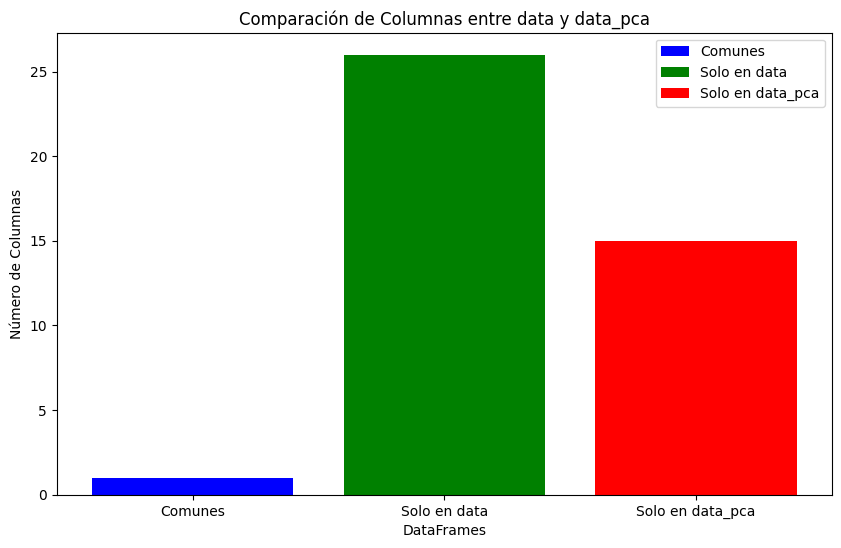

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que tienes los DataFrames 'data' y 'data_pca' cargados

# Obtén la lista de columnas de cada DataFrame
columnas_data = set(data.columns)
columnas_data_pca = set(data_pca.columns)

# Encuentra las columnas que están en ambos DataFrames
columnas_comunes = list(columnas_data.intersection(columnas_data_pca))

# Encuentra las columnas que están solo en 'data'
columnas_solo_data = list(columnas_data.difference(columnas_data_pca))

# Encuentra las columnas que están solo en 'data_pca'
columnas_solo_data_pca = list(columnas_data_pca.difference(columnas_data))

# Crea un gráfico de barras que muestre las columnas comunes y las columnas exclusivas en ambos DataFrames
plt.figure(figsize=(10, 6))
plt.bar("Comunes", len(columnas_comunes), label="Comunes", color='b')
plt.bar("Solo en data", len(columnas_solo_data), label="Solo en data", color='g')
plt.bar("Solo en data_pca", len(columnas_solo_data_pca), label="Solo en data_pca", color='r')
plt.xlabel('DataFrames')
plt.ylabel('Número de Columnas')
plt.title('Comparación de Columnas entre data y data_pca')
plt.legend()
plt.show()


Entrenamiento de Modelos

Ahora probaremos una gama de modelos. En cada uno de ellos encajaremos el modelo en los datos del tren, haremos predicciones para los datos de prueba y obtendremos la precisión. En pasos posteriores compararemos la precisión de todos los modelos

In [ ]:
%pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.0 MB/s eta 0:00:00


In [ ]:
from sklearn.utils import resample
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split

# Divide el conjunto de datos 'data' en conjuntos de entrenamiento y prueba
data_train, data_test = train_test_split(data, test_size=0.2, random_state=1234)
X_train_data, y_train_data = data_train.iloc[:, 5:36], data_train.iloc[:, 0]
X_test_data, y_test_data = data_test.iloc[:, 5:36], data_test.iloc[:, 0]

# Divide el conjunto de datos 'data_pca_df' en conjuntos de entrenamiento y prueba
X = data_pca.drop(columns=['Rating'])
y = data_pca['Rating']
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X, y, test_size=0.2, random_state=1234)

# Ahora puedes utilizar las variables X_train_data, y_train_data, X_test_data, y_test_data
# para el modelo sin PCA, y las variables X_train_pca, y_train_pca, X_test_pca, y_test_pca
# para el modelo con PCA, y deberían ser diferentes.

XG BOOST

In [ ]:
#SIN PCA
from sklearn import metrics  # Importa el módulo de métricas de scikit-learn

XGB_model = XGBClassifier(objective='multi:softmax', num_class=4)
XGB_model.fit(X_train_data, y_train_data)
y_pred_XGB = XGB_model.predict(X_test_data)
Accuracy_XGB = metrics.accuracy_score(y_test_data, y_pred_XGB)
print("XGB Accuracy:", Accuracy_XGB)

XGB Accuracy: 0.6592592592592592


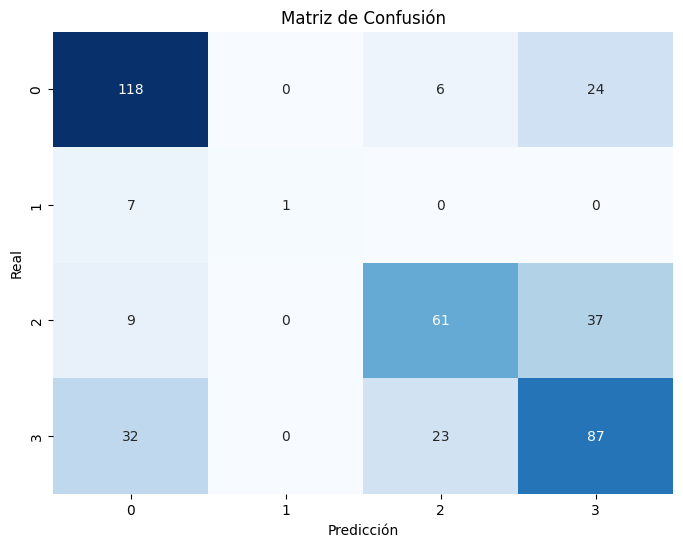

In [ ]:
# Calcular la matriz de confusión
conf_matrix_XGB = confusion_matrix(y_test_data, y_pred_XGB)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_XGB, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Supongamos que ya tienes la matriz de confusión conf_matrix_XGB

# Calcular precision, recall y F1 score a partir de la matriz de confusión
precision_XGB = precision_score(y_test_data, y_pred_XGB, average='weighted')
recall_XGB = recall_score(y_test_data, y_pred_XGB, average='weighted')
f1_score_XGB = f1_score(y_test_data, y_pred_XGB, average='weighted')

# Imprimir las métricas
print(f'Precision: {precision_XGB:.4f}')
print(f'Recall: {recall_XGB:.4f}')
print(f'F1 Score: {f1_score_XGB:.4f}')

Precision: 0.6647
Recall: 0.6593
F1 Score: 0.6530


In [ ]:
#Validacion estratificada (data la poca cantidad de muestras)
from sklearn.model_selection import StratifiedKFold, cross_val_score
from xgboost import XGBClassifier  # Importa XGBoost si aún no lo has hecho
from sklearn import metrics  # Importa el módulo de métricas de scikit-learn

# Crear un objeto StratifiedKFold para dividir los datos estratificadamente
stratified_kfold = StratifiedKFold(n_splits=5, random_state=1234, shuffle=True)

# Define tu modelo XGBoost
XGB_model = XGBClassifier(objective='multi:softmax', num_class=4)

# Realizar validación cruzada estratificada en tus datos sin PCA
scores_sin_pca = cross_val_score(XGB_model, X_train_data, y_train_data, cv=stratified_kfold, scoring='accuracy')

# Imprimir los puntajes de precisión para cada división
print("Puntajes de precisión sin PCA:", scores_sin_pca)
print("Precisión promedio sin PCA:", scores_sin_pca.mean())

# También puedes realizar la validación cruzada en los datos con PCA de manera similar
scores_con_pca = cross_val_score(XGB_model, X_train_pca, y_train_pca, cv=stratified_kfold, scoring='accuracy')

# Imprimir los puntajes de precisión para cada división
print("Puntajes de precisión con PCA:", scores_con_pca)
print("Precisión promedio con PCA:", scores_con_pca.mean())

Puntajes de precisión sin PCA: [0.65432099 0.65634675 0.61919505 0.65634675 0.63157895]
Precisión promedio sin PCA: 0.6435576959828767
Puntajes de precisión con PCA: [0.4845679  0.49226006 0.47678019 0.46130031 0.48297214]
Precisión promedio con PCA: 0.479576118946604


In [ ]:
#Reporte de clasificacion sin PCA
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Crear un objeto StratifiedKFold para dividir los datos estratificadamente
stratified_kfold = StratifiedKFold(n_splits=5, random_state=1234, shuffle=True)

# Define tu modelo XGBoost
XGB_model = XGBClassifier(objective='multi:softmax', num_class=4)

# Realizar validación cruzada estratificada y obtener las predicciones
y_pred = cross_val_predict(XGB_model, X_train_data, y_train_data, cv=stratified_kfold)

# Calcular la matriz de confusión y el informe de clasificación
conf_matrix = confusion_matrix(y_train_data, y_pred)
class_report = classification_report(y_train_data, y_pred)

# Imprimir la matriz de confusión y el informe de clasificación
print("Matriz de Confusión:")
print(conf_matrix)
print("\nInforme de Clasificación:")
print(class_report)

Matriz de Confusión:
[[478   9  35 122]
 [ 44  12   2   5]
 [ 27   0 250 103]
 [152   0  77 300]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       644
           1       0.57      0.19      0.29        63
           2       0.69      0.66      0.67       380
           3       0.57      0.57      0.57       529

    accuracy                           0.64      1616
   macro avg       0.63      0.54      0.56      1616
weighted avg       0.64      0.64      0.64      1616



In [ ]:
#CON PCA
from sklearn import metrics  # Importa el módulo de métricas de scikit-learn

# Crea y entrena tu modelo XGBoost
XGB_model_pca = XGBClassifier(objective='multi:softmax', num_class=4)
XGB_model_pca.fit(X_train_pca, y_train_pca)

# Realiza predicciones en el conjunto de prueba
y_pred_XGB_pca = XGB_model_pca.predict(X_test_pca)

# Calcula la precisión del modelo
Accuracy_XGB_pca = metrics.accuracy_score(y_test_pca, y_pred_XGB_pca)
print("XGB Accuracy (Data After PCA):", Accuracy_XGB_pca)

XGB Accuracy (Data After PCA): 0.4962962962962963


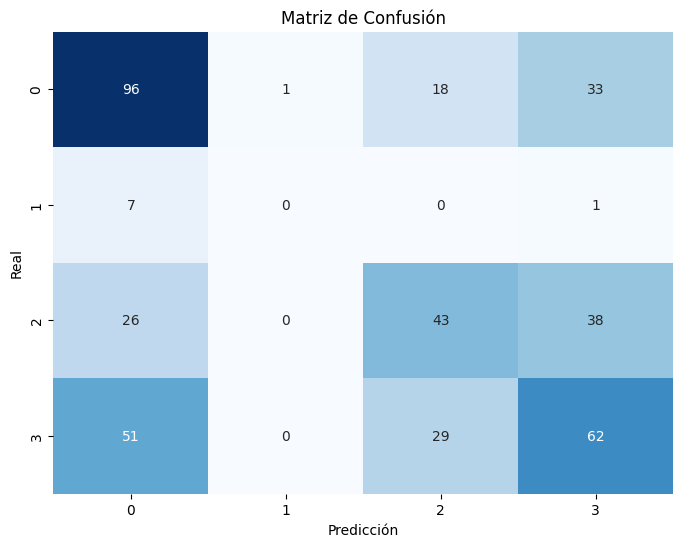

In [ ]:
# Calcular la matriz de confusión
conf_matrix_XGB_pca = confusion_matrix(y_test_pca, y_pred_XGB_pca)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_XGB_pca, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Supongamos que ya tienes la matriz de confusión conf_matrix_XGB_pca

# Calcular precision, recall y F1 score a partir de la matriz de confusión después de PCA
precision_XGB_pca = precision_score(y_test_pca, y_pred_XGB_pca, average='weighted')
recall_XGB_pca = recall_score(y_test_pca, y_pred_XGB_pca, average='weighted')
f1_score_XGB_pca = f1_score(y_test_pca, y_pred_XGB_pca, average='weighted')

# Imprimir las métricas después de PCA
print(f'Precision (After PCA): {precision_XGB_pca:.4f}')
print(f'Recall (After PCA): {recall_XGB_pca:.4f}')
print(f'F1 Score (After PCA): {f1_score_XGB_pca:.4f}')

Precision (After PCA): 0.4834
Recall (After PCA): 0.4963
F1 Score (After PCA): 0.4868


Gradient Boosting Clasifier

In [ ]:
#SIN PCA
from sklearn.ensemble import GradientBoostingClassifier  # Importa la clase GradientBoostingClassifier

GBT_model = GradientBoostingClassifier(random_state=123)
GBT_model.fit(X_train_data, y_train_data)
y_pred_GBT = GBT_model.predict(X_test_data)
Accuracy_GBT = metrics.accuracy_score(y_test_data, y_pred_GBT)
print("GBT Accuracy:",Accuracy_GBT)

GBT Accuracy: 0.582716049382716


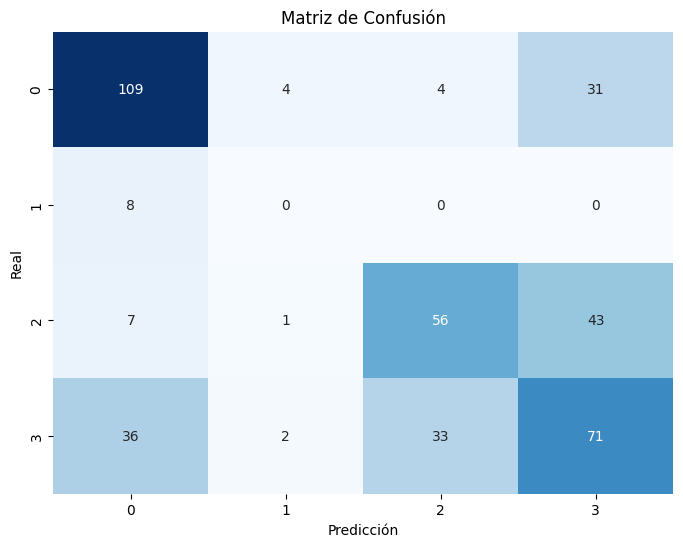

In [ ]:
# Calcular la matriz de confusión
conf_matrix_GBT = confusion_matrix(y_test_data, y_pred_GBT)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_GBT, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


# Calcular precision, recall y F1 score a partir de la matriz de confusión
precision_GBT = precision_score(y_test_data, y_pred_GBT, average='weighted')
recall_GBT = recall_score(y_test_data, y_pred_GBT, average='weighted')
f1_score_GBT = f1_score(y_test_data, y_pred_GBT, average='weighted')

# Imprimir las métricas
print(f'Precision: {precision_GBT:.4f}')
print(f'Recall: {recall_GBT:.4f}')
print(f'F1 Score: {f1_score_GBT:.4f}')

Precision: 0.5797
Recall: 0.5827
F1 Score: 0.5801


In [ ]:
#CON PCA

from sklearn.ensemble import GradientBoostingClassifier
GBT_model = GradientBoostingClassifier(random_state=123)
GBT_model.fit(X_train_pca, y_train_pca)

# Realiza predicciones en el conjunto de prueba con data_pca
y_pred_GBT_pca = GBT_model.predict(X_test_pca)
Accuracy_GBT_pca = metrics.accuracy_score(y_test_pca, y_pred_GBT_pca)
print("GBT Accuracy (Data After PCA):", Accuracy_GBT_pca)

GBT Accuracy (Data After PCA): 0.49382716049382713


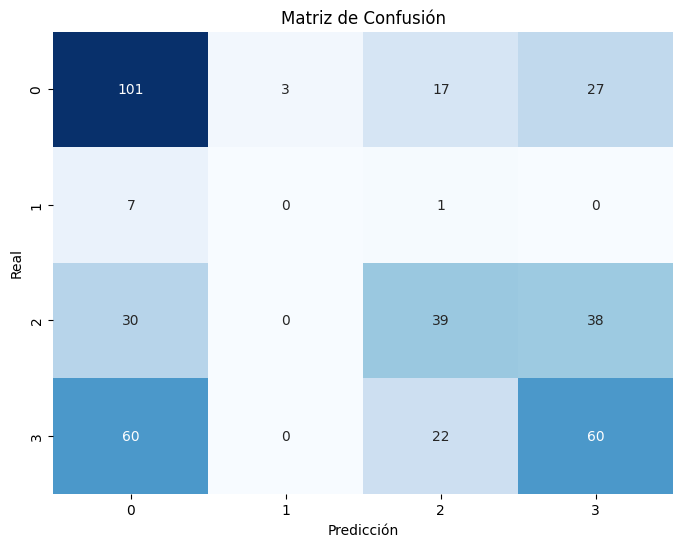

In [ ]:
# Calcular la matriz de confusión
conf_matrix_GBT_pca = confusion_matrix(y_test_pca, y_pred_GBT_pca)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_GBT_pca, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


# Calcular precision, recall y F1 score a partir de la matriz de confusión después de PCA
precision_GBT_pca = precision_score(y_test_pca, y_pred_GBT_pca, average='weighted')
recall_GBT_pca = recall_score(y_test_pca, y_pred_GBT_pca, average='weighted')
f1_score_GBT_pca = f1_score(y_test_pca, y_pred_GBT_pca, average='weighted')

# Imprimir las métricas después de PCA
print(f'Precision (After PCA): {precision_GBT_pca:.4f}')
print(f'Recall (After PCA): {recall_GBT_pca:.4f}')
print(f'F1 Score (After PCA): {f1_score_GBT_pca:.4f}')

Precision (After PCA): 0.4851
Recall (After PCA): 0.4938
F1 Score (After PCA): 0.4817


Random Forest

In [ ]:
#SIN PCA
from sklearn.ensemble import RandomForestClassifier  # Importa la clase RandomForestClassifier

# Resto de tu código
RF_model = RandomForestClassifier(n_estimators=100, random_state=0)
RF_model.fit(X_train_data, y_train_data)
y_pred_RF = RF_model.predict(X_test_data)
Accuracy_RF = metrics.accuracy_score(y_test_data, y_pred_RF)
print("Random Forest Accuracy:", Accuracy_RF)

Random Forest Accuracy: 0.6419753086419753


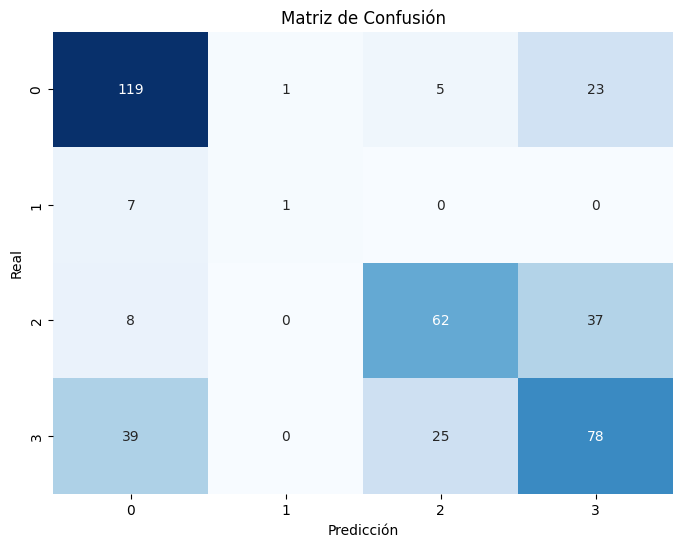

In [ ]:
# Calcular la matriz de confusión
conf_matrix_RF = confusion_matrix(y_test_data, y_pred_RF)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_RF, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Supongamos que ya tienes la matriz de confusión conf_matrix_RF

# Calcular precision, recall y F1 score a partir de la matriz de confusión
precision_RF = precision_score(y_test_data, y_pred_RF, average='weighted')
recall_RF = recall_score(y_test_data, y_pred_RF, average='weighted')
f1_score_RF = f1_score(y_test_data, y_pred_RF, average='weighted')

# Imprimir las métricas
print(f'Precision: {precision_RF:.4f}')
print(f'Recall: {recall_RF:.4f}')
print(f'F1 Score: {f1_score_RF:.4f}')

Precision: 0.6375
Recall: 0.6420
F1 Score: 0.6349


In [ ]:
#CON PCA
from sklearn.ensemble import RandomForestClassifier  # Importa la clase RandomForestClassifier

# Crea y entrena tu modelo RandomForest con data_pca
RF_model = RandomForestClassifier(n_estimators=100, random_state=0)
RF_model.fit(X_train_pca, y_train_pca)

# Realiza predicciones en el conjunto de prueba con data_pca
y_pred_RF_pca = RF_model.predict(X_test_pca)
Accuracy_RF_pca = metrics.accuracy_score(y_test_pca, y_pred_RF_pca)
print("Random Forest Accuracy (Data After PCA):", Accuracy_RF_pca)

Random Forest Accuracy (Data After PCA): 0.528395061728395


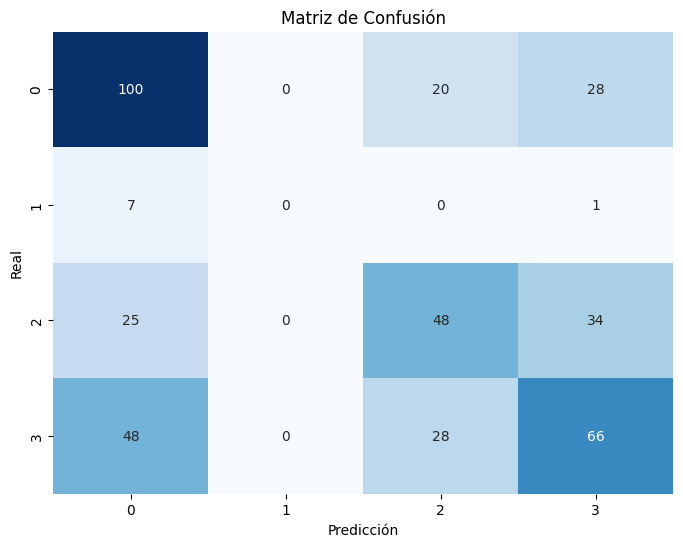

In [ ]:
# Calcular la matriz de confusión
conf_matrix_RF_pca = confusion_matrix(y_test_pca, y_pred_RF_pca)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_RF_pca, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Supongamos que ya tienes la matriz de confusión conf_matrix_RF_pca

# Calcular precision, recall y F1 score a partir de la matriz de confusión después de PCA
precision_RF_pca = precision_score(y_test_pca, y_pred_RF_pca, average='weighted')
recall_RF_pca = recall_score(y_test_pca, y_pred_RF_pca, average='weighted')
f1_score_RF_pca = f1_score(y_test_pca, y_pred_RF_pca, average='weighted')

# Imprimir las métricas después de PCA
print(f'Precision (After PCA): {precision_RF_pca:.4f}')
print(f'Recall (After PCA): {recall_RF_pca:.4f}')
print(f'F1 Score (After PCA): {f1_score_RF_pca:.4f}')

Precision (After PCA): 0.5145
Recall (After PCA): 0.5284
F1 Score (After PCA): 0.5185


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Suppor Vector Machine

In [ ]:
#SIN PCA
#from sklearn import svm  # Importa el módulo de máquinas de soporte vectorial (SVM)


##SVC_model = svm.SVC(kernel='rbf', gamma= 2, C = 5, random_state=1234)
#SVC_model.fit(X_train_data, y_train_data)
#y_pred_SVM = SVC_model.predict(X_test_data)
#Accuracy_SVM = metrics.accuracy_score(y_test_data, y_pred_SVM)
#print("SVM Accuracy:",Accuracy_SVM)


In [ ]:
# Calcular la matriz de confusión
#conf_matrix_SVM = confusion_matrix(y_test_data, y_pred_SVM)

# Visualizar la matriz de confusión
#plt.figure(figsize=(8, 6))
#sns.heatmap(conf_matrix_SVM, annot=True, fmt='d', cmap='Blues', cbar=False)
#plt.xlabel('Predicción')
#plt.ylabel('Real')
#plt.title('Matriz de Confusión')
#plt.show()

In [ ]:
#from sklearn.metrics import precision_score, recall_score, f1_score

# Supongamos que ya tienes la matriz de confusión conf_matrix_SVM

# Calcular precision, recall y F1 score a partir de la matriz de confusión
#precision_SVM = precision_score(y_test_data, y_pred_SVM, average='weighted')
#recall_SVM = recall_score(y_test_data, y_pred_SVM, average='weighted')
#f1_score_SVM = f1_score(y_test_data, y_pred_SVM, average='weighted')

# Imprimir las métricas
#print(f'Precision: {precision_SVM:.4f}')
#print(f'Recall: {recall_SVM:.4f}')
#print(f'F1 Score: {f1_score_SVM:.4f}')


In [ ]:
#Con PCA
#from sklearn import svm  # Importa el módulo de máquinas de soporte vectorial (SVM)
# Crea y entrena tu modelo SVM con data_pca
#SVC_model = svm.SVC(kernel='rbf', gamma=2, C=5, random_state=1234)
#SVC_model.fit(X_train_pca, y_train_pca)

# Realiza predicciones en el conjunto de prueba con data_pca
#y_pred_SVM_pca = SVC_model.predict(X_test_pca)
#Accuracy_SVM_pca = metrics.accuracy_score(y_test_pca, y_pred_SVM_pca)
#print("SVM Accuracy (Data After PCA):", Accuracy_SVM_pca)

In [ ]:
# Calcular la matriz de confusión
#conf_matrix_SVM_pca = confusion_matrix(y_test_pca, y_pred_SVM_pca)

# Visualizar la matriz de confusión
#plt.figure(figsize=(8, 6))
#sns.heatmap(conf_matrix_SVM_pca, annot=True, fmt='d', cmap='Blues', cbar=False)
#plt.xlabel('Predicción')
#plt.ylabel('Real')
#plt.title('Matriz de Confusión')
#plt.show()

In [ ]:
#from sklearn.metrics import precision_score, recall_score, f1_score

# Supongamos que ya tienes la matriz de confusión conf_matrix_SVM_pca

# Calcular precision, recall y F1 score a partir de la matriz de confusión después de PCA
#precision_SVM_pca = precision_score(y_test_pca, y_pred_SVM_pca, average='weighted')
#recall_SVM_pca = recall_score(y_test_pca, y_pred_SVM_pca, average='weighted')
#f1_score_SVM_pca = f1_score(y_test_pca, y_pred_SVM_pca, average='weighted')

# Imprimir las métricas después de PCA
#print(f'Precision (After PCA): {precision_SVM_pca:.4f}')
#print(f'Recall (After PCA): {recall_SVM_pca:.4f}')
#print(f'F1 Score (After PCA): {f1_score_SVM_pca:.4f}')


Red Neuronal

In [ ]:

#SIN PCA
#from sklearn.neural_network import MLPClassifier  # Importa la clase MLPClassifier


#MLP_model = MLPClassifier(hidden_layer_sizes=(5,5,5), activation='logistic', solver='adam', max_iter=1500)
#MLP_model.fit(X_train_data, y_train_data)
#y_pred_MLP = MLP_model.predict(X_test_data)
#Accuracy_MLP = metrics.accuracy_score(y_test_data, y_pred_MLP)
#print("MLP Accuracy:",Accuracy_MLP)

In [ ]:
# Calcular la matriz de confusión
#conf_matrix_MLP = confusion_matrix(y_test_data, y_pred_MLP)

# Visualizar la matriz de confusión
#plt.figure(figsize=(8, 6))
#sns.heatmap(conf_matrix_MLP, annot=True, fmt='d', cmap='Blues', cbar=False)
#plt.xlabel('Predicción')
#plt.ylabel('Real')
#plt.title('Matriz de Confusión')
#plt.show()

In [ ]:
#from sklearn.metrics import precision_score, recall_score, f1_score

# Supongamos que ya tienes la matriz de confusión conf_matrix_MLP

# Calcular precision, recall y F1 score a partir de la matriz de confusión
#precision_MLP = precision_score(y_test_data, y_pred_MLP, average='weighted')
#recall_MLP = recall_score(y_test_data, y_pred_MLP, average='weighted')
#f1_score_MLP = f1_score(y_test_data, y_pred_MLP, average='weighted')

# Imprimir las métricas
#print(f'Precision: {precision_MLP:.4f}')
#print(f'Recall: {recall_MLP:.4f}')
#print(f'F1 Score: {f1_score_MLP:.4f}')


In [ ]:
# CON PCA
#from sklearn.neural_network import MLPClassifier  # Importa la clase MLPClassifier
# Crea y entrena tu modelo MLP con data_pca
#MLP_model = MLPClassifier(hidden_layer_sizes=(5, 5, 5), activation='logistic', solver='adam', max_iter=1500, random_state=1234)
#MLP_model.fit(X_train_pca, y_train_pca)

# Realiza predicciones en el conjunto de prueba con data_pca
#y_pred_MLP_pca = MLP_model.predict(X_test_pca)
#Accuracy_MLP_pca = metrics.accuracy_score(y_test_pca, y_pred_MLP_pca)
#print("MLP Accuracy (Data After PCA):", Accuracy_MLP_pca)

In [ ]:
# Calcular la matriz de confusión
#conf_matrix_MLP_pca = confusion_matrix(y_test_pca, y_pred_MLP_pca)

# Visualizar la matriz de confusión
#plt.figure(figsize=(8, 6))
#sns.heatmap(conf_matrix_MLP_pca, annot=True, fmt='d', cmap='Blues', cbar=False)
#plt.xlabel('Predicción')
#plt.ylabel('Real')
#plt.title('Matriz de Confusión')
#plt.show()

In [ ]:
#from sklearn.metrics import precision_score, recall_score, f1_score

# Supongamos que ya tienes la matriz de confusión conf_matrix_MLP_pca

# Calcular precision, recall y F1 score a partir de la matriz de confusión después de PCA
#precision_MLP_pca = precision_score(y_test_pca, y_pred_MLP_pca, average='weighted')
#recall_MLP_pca = recall_score(y_test_pca, y_pred_MLP_pca, average='weighted')
#f1_score_MLP_pca = f1_score(y_test_pca, y_pred_MLP_pca, average='weighted')

# Imprimir las métricas después de PCA
#print(f'Precision (After PCA): {precision_MLP_pca:.4f}')
#print(f'Recall (After PCA): {recall_MLP_pca:.4f}')
#print(f'F1 Score (After PCA): {f1_score_MLP_pca:.4f}')


Catboost

In [ ]:
#SIN PCA
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score


CatBoost_model = CatBoostClassifier(iterations=100, random_state=0)  # Puedes ajustar más parámetros según sea necesario
CatBoost_model.fit(X_train_data, y_train_data, verbose=100)  # 'verbose' muestra información sobre el proceso de ajuste
y_pred_CatBoost = CatBoost_model.predict(X_test_data)
Accuracy_CatBoost = accuracy_score(y_test_data, y_pred_CatBoost)
print("CatBoost Accuracy:", Accuracy_CatBoost)


Learning rate set to 0.5
0:	learn: 1.2052624	total: 66.9ms	remaining: 6.62s
99:	learn: 0.1711788	total: 2.73s	remaining: 0us
CatBoost Accuracy: 0.5950617283950618


In [ ]:

#CON PCA
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Crea y entrena tu modelo CatBoost con data_pca
CatBoost_model_pca = CatBoostClassifier(iterations=100, random_state=0)  # Puedes ajustar más parámetros según sea necesario
CatBoost_model_pca.fit(X_train_pca, y_train_pca, verbose=100)  # 'verbose' muestra información sobre el proceso de ajuste

# Realiza predicciones en el conjunto de prueba con data_pca
y_pred_CatBoost_pca = CatBoost_model_pca.predict(X_test_pca)
Accuracy_CatBoost_pca = accuracy_score(y_test_pca, y_pred_CatBoost_pca)
print("CatBoost Accuracy (Data After PCA):", Accuracy_CatBoost_pca)


Learning rate set to 0.5
0:	learn: 1.2354461	total: 17.8ms	remaining: 1.76s
99:	learn: 0.3868638	total: 1.36s	remaining: 0us
CatBoost Accuracy (Data After PCA): 0.49382716049382713


In [ ]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión antes de PCA
conf_matrix_CatBoost = confusion_matrix(y_test_data, y_pred_CatBoost)

# Imprimir la matriz de confusión
print("Matriz de Confusión (CatBoost sin PCA):")
print(conf_matrix_CatBoost)


# Calcular y imprimir las métricas
precision_CatBoost = precision_score(y_test_data, y_pred_CatBoost, average='weighted')
recall_CatBoost = recall_score(y_test_data, y_pred_CatBoost, average='weighted')
f1_score_CatBoost = f1_score(y_test_data, y_pred_CatBoost, average='weighted')

print(f'Precision: {precision_CatBoost:.4f}')
print(f'Recall: {recall_CatBoost:.4f}')
print(f'F1 Score: {f1_score_CatBoost:.4f}')


Matriz de Confusión (CatBoost sin PCA):
[[107   0  11  30]
 [  7   1   0   0]
 [ 10   0  63  34]
 [ 40   1  31  70]]
Precision: 0.5900
Recall: 0.5951
F1 Score: 0.5895


In [ ]:
# Calcular la matriz de confusión después de PCA
conf_matrix_CatBoost_pca = confusion_matrix(y_test_pca, y_pred_CatBoost_pca)

# Imprimir la matriz de confusión
print("Matriz de Confusión (CatBoost con PCA):")
print(conf_matrix_CatBoost_pca)

# Calcular y imprimir las métricas después de PCA
precision_CatBoost_pca = precision_score(y_test_pca, y_pred_CatBoost_pca, average='weighted')
recall_CatBoost_pca = recall_score(y_test_pca, y_pred_CatBoost_pca, average='weighted')
f1_score_CatBoost_pca = f1_score(y_test_pca, y_pred_CatBoost_pca, average='weighted')

print(f'Precision: {precision_CatBoost_pca:.4f}')
print(f'Recall: {recall_CatBoost_pca:.4f}')
print(f'F1 Score: {f1_score_CatBoost_pca:.4f}')

Matriz de Confusión (CatBoost con PCA):
[[93  2 19 34]
 [ 5  0  3  0]
 [21  0 47 39]
 [45  2 35 60]]
Precision: 0.4848
Recall: 0.4938
F1 Score: 0.4885


Naive Bayes

In [ ]:
#SIN PCA
from sklearn.naive_bayes import GaussianNB  # Importa la clase GaussianNB

GNB_model = GaussianNB()
GNB_model.fit(X_train_data, y_train_data)
y_pred_GNB = GNB_model.predict(X_test_data)
Accuracy_GNB = metrics.accuracy_score(y_test_data, y_pred_GNB)
print("GNB Accuracy:",Accuracy_GNB)

GNB Accuracy: 0.29876543209876544


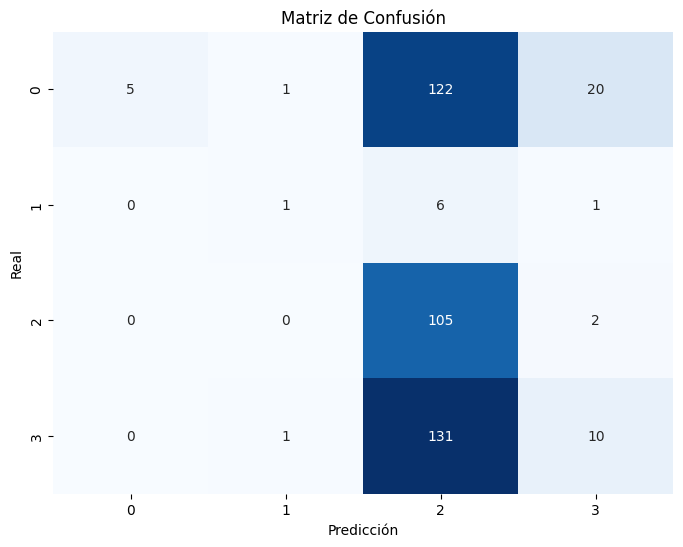

In [ ]:
# Calcular la matriz de confusión
conf_matrix_GNB = confusion_matrix(y_test_data, y_pred_GNB)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_GNB, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Supongamos que ya tienes la matriz de confusión conf_matrix_GNB

# Calcular precision, recall y F1 score a partir de la matriz de confusión
precision_GNB = precision_score(y_test_data, y_pred_GNB, average='weighted')
recall_GNB = recall_score(y_test_data, y_pred_GNB, average='weighted')
f1_score_GNB = f1_score(y_test_data, y_pred_GNB, average='weighted')

# Imprimir las métricas
print(f'Precision: {precision_GNB:.4f}')
print(f'Recall: {recall_GNB:.4f}')
print(f'F1 Score: {f1_score_GNB:.4f}')


Precision: 0.5545
Recall: 0.2988
F1 Score: 0.1853


In [ ]:
#CON PCA
from sklearn.naive_bayes import GaussianNB  # Importa la clase GaussianNB
# Crea y entrena tu modelo Naive Bayes con data_pca
GNB_model = GaussianNB()
GNB_model.fit(X_train_pca, y_train_pca)

# Realiza predicciones en el conjunto de prueba con data_pca
y_pred_GNB_pca = GNB_model.predict(X_test_pca)
Accuracy_GNB_pca = metrics.accuracy_score(y_test_pca, y_pred_GNB_pca)
print("GNB Accuracy (Data After PCA):", Accuracy_GNB_pca)

GNB Accuracy (Data After PCA): 0.39753086419753086


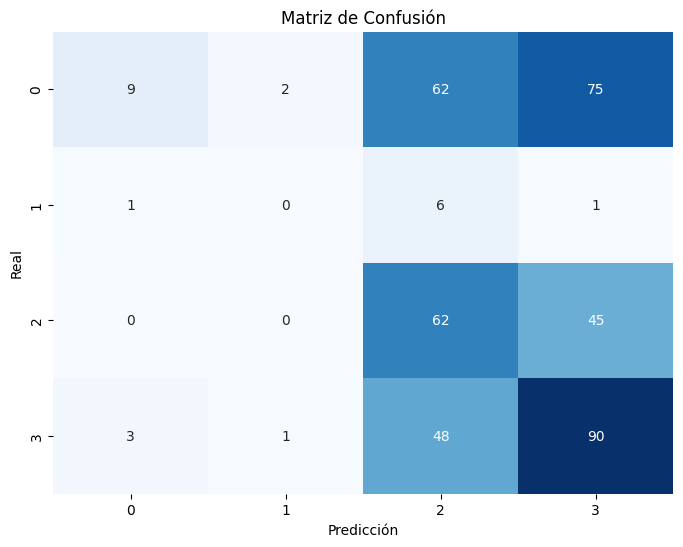

In [ ]:
# Calcular la matriz de confusión
conf_matrix_GNB_pca = confusion_matrix(y_test_pca, y_pred_GNB_pca)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_GNB_pca, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Supongamos que ya tienes la matriz de confusión conf_matrix_GNB_pca

# Calcular precision, recall y F1 score a partir de la matriz de confusión después de PCA
precision_GNB_pca = precision_score(y_test_pca, y_pred_GNB_pca, average='weighted')
recall_GNB_pca = recall_score(y_test_pca, y_pred_GNB_pca, average='weighted')
f1_score_GNB_pca = f1_score(y_test_pca, y_pred_GNB_pca, average='weighted')

# Imprimir las métricas después de PCA
print(f'Precision (After PCA): {precision_GNB_pca:.4f}')
print(f'Recall (After PCA): {recall_GNB_pca:.4f}')
print(f'F1 Score (After PCA): {f1_score_GNB_pca:.4f}')


Precision (After PCA): 0.4946
Recall (After PCA): 0.3975
F1 Score (After PCA): 0.3346


Liner DiscrimiatAnalysis

In [ ]:
#SIN PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Importa la clase LinearDiscriminantAnalysis
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train_data,y_train_data)
y_pred_LDA = LDA_model.predict(X_test_data)
Accuracy_LDA = metrics.accuracy_score(y_test_data, y_pred_LDA)
print("LDA Accuracy:",Accuracy_LDA)

LDA Accuracy: 0.38765432098765434


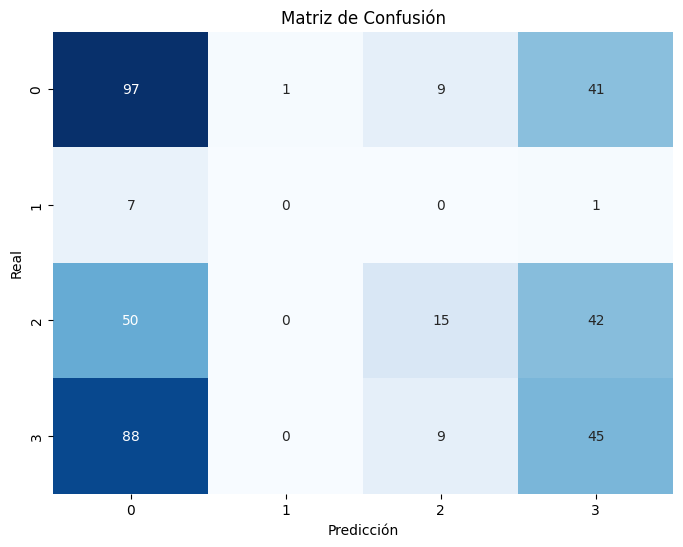

In [ ]:
# Calcular la matriz de confusión
conf_matrix_LDA = confusion_matrix(y_test_data, y_pred_LDA)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_LDA, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Supongamos que ya tienes la matriz de confusión conf_matrix_LDA

# Calcular precision, recall y F1 score a partir de la matriz de confusión
precision_LDA = precision_score(y_test_data, y_pred_LDA, average='weighted')
recall_LDA = recall_score(y_test_data, y_pred_LDA, average='weighted')
f1_score_LDA = f1_score(y_test_data, y_pred_LDA, average='weighted')

# Imprimir las métricas
print(f'Precision: {precision_LDA:.4f}')
print(f'Recall: {recall_LDA:.4f}')
print(f'F1 Score: {f1_score_LDA:.4f}')


Precision: 0.3889
Recall: 0.3877
F1 Score: 0.3548


In [ ]:
#CON PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Importa la clase LinearDiscriminantAnalysis

# Crea y entrena tu modelo Linear Discriminant Analysis con data_pca
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train_pca, y_train_pca)

# Realiza predicciones en el conjunto de prueba con data_pca
y_pred_LDA_pca = LDA_model.predict(X_test_pca)
Accuracy_LDA_pca = metrics.accuracy_score(y_test_pca, y_pred_LDA_pca)
print("LDA Accuracy (Data After PCA):", Accuracy_LDA_pca)

LDA Accuracy (Data After PCA): 0.39753086419753086


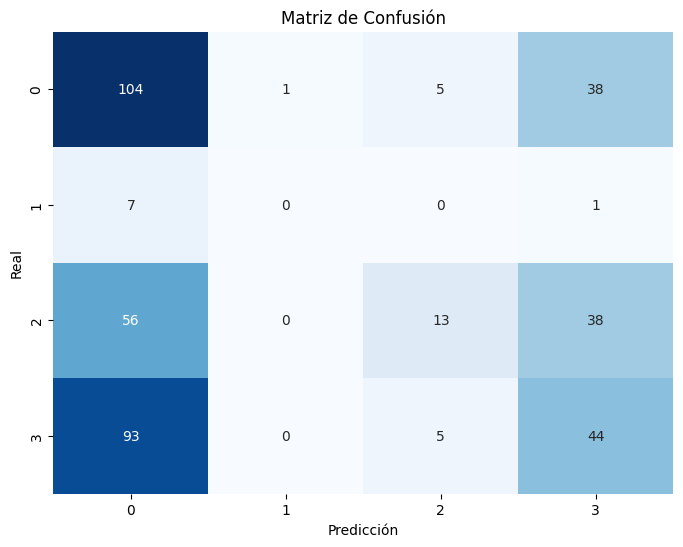

In [ ]:
# Calcular la matriz de confusión
conf_matrix_LDA_pca = confusion_matrix(y_test_pca, y_pred_LDA_pca)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_LDA_pca, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Supongamos que ya tienes la matriz de confusión conf_matrix_LDA_pca

# Calcular precision, recall y F1 score a partir de la matriz de confusión después de PCA
precision_LDA_pca = precision_score(y_test_pca, y_pred_LDA_pca, average='weighted')
recall_LDA_pca = recall_score(y_test_pca, y_pred_LDA_pca, average='weighted')
f1_score_LDA_pca = f1_score(y_test_pca, y_pred_LDA_pca, average='weighted')

# Imprimir las métricas después de PCA
print(f'Precision (After PCA): {precision_LDA_pca:.4f}')
print(f'Recall (After PCA): {recall_LDA_pca:.4f}')
print(f'F1 Score (After PCA): {f1_score_LDA_pca:.4f}')


Precision (After PCA): 0.4230
Recall (After PCA): 0.3975
F1 Score (After PCA): 0.3565


Quadratic Analysis Discrimant

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis  # Importa la clase QuadraticDiscriminantAnalysis
QDA_model = QuadraticDiscriminantAnalysis()
QDA_model.fit(X_train_data,y_train_data)
y_pred_QDA = QDA_model.predict(X_test_data)
Accuracy_QDA = metrics.accuracy_score(y_test_data, y_pred_QDA)
print("QDA Accuracy:",Accuracy_QDA)

QDA Accuracy: 0.3234567901234568


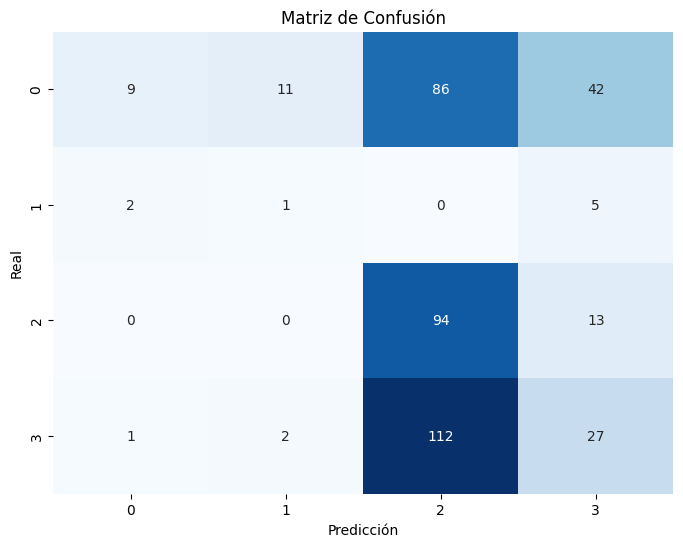

In [ ]:
# Calcular la matriz de confusión
conf_matrix_QDA = confusion_matrix(y_test_data, y_pred_QDA)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_QDA, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Supongamos que ya tienes la matriz de confusión conf_matrix_QDA

# Calcular precision, recall y F1 score a partir de la matriz de confusión
precision_QDA = precision_score(y_test_data, y_pred_QDA, average='weighted')
recall_QDA = recall_score(y_test_data, y_pred_QDA, average='weighted')
f1_score_QDA = f1_score(y_test_data, y_pred_QDA, average='weighted')

# Imprimir las métricas
print(f'Precision: {precision_QDA:.4f}')
print(f'Recall: {recall_QDA:.4f}')
print(f'F1 Score: {f1_score_QDA:.4f}')


Precision: 0.4693
Recall: 0.3235
F1 Score: 0.2501


In [ ]:
#CON PCA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis  # Importa la clase QuadraticDiscriminantAnalysis
# Crea y entrena tu modelo QDA con datos después del PCA
QDA_model_pca = QuadraticDiscriminantAnalysis()
QDA_model_pca.fit(X_train_pca, y_train_pca)

# Realiza predicciones en el conjunto de prueba (datos después del PCA)
y_pred_QDA_pca = QDA_model_pca.predict(X_test_pca)

# Calcula la precisión del modelo (datos después del PCA)
Accuracy_QDA_pca = metrics.accuracy_score(y_test_pca, y_pred_QDA_pca)
print("QDA Accuracy (Data After PCA):", Accuracy_QDA_pca)

QDA Accuracy (Data After PCA): 0.3135802469135803


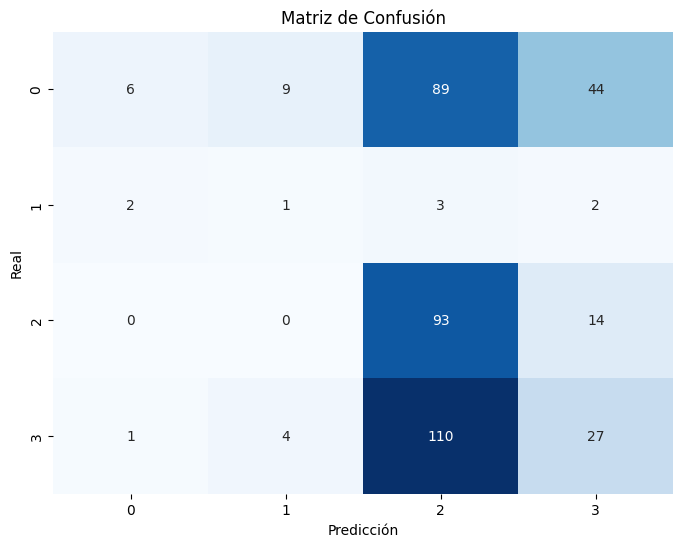

In [ ]:
# Calcular la matriz de confusión
conf_matrix_QDA_pca = confusion_matrix(y_test_pca, y_pred_QDA_pca)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_QDA_pca, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Supongamos que ya tienes la matriz de confusión conf_matrix_QDA_pca

# Calcular precision, recall y F1 score a partir de la matriz de confusión después de PCA
precision_QDA_pca = precision_score(y_test_pca, y_pred_QDA_pca, average='weighted')
recall_QDA_pca = recall_score(y_test_pca, y_pred_QDA_pca, average='weighted')
f1_score_QDA_pca = f1_score(y_test_pca, y_pred_QDA_pca, average='weighted')

# Imprimir las métricas después de PCA
print(f'Precision (After PCA): {precision_QDA_pca:.4f}')
print(f'Recall (After PCA): {recall_QDA_pca:.4f}')
print(f'F1 Score (After PCA): {f1_score_QDA_pca:.4f}')


Precision (After PCA): 0.4371
Recall (After PCA): 0.3136
F1 Score (After PCA): 0.2346


K Vencinos Cercanos

In [ ]:
#SIN PCA
KNN_model = KNeighborsClassifier(n_neighbors = 3)
KNN_model.fit(X_train_data,y_train_data)
y_pred_KNN = KNN_model.predict(X_test_data)
Accuracy_KNN = metrics.accuracy_score(y_test_data, y_pred_KNN)
print("KNN Accuracy:",Accuracy_KNN)

KNN Accuracy: 0.4839506172839506


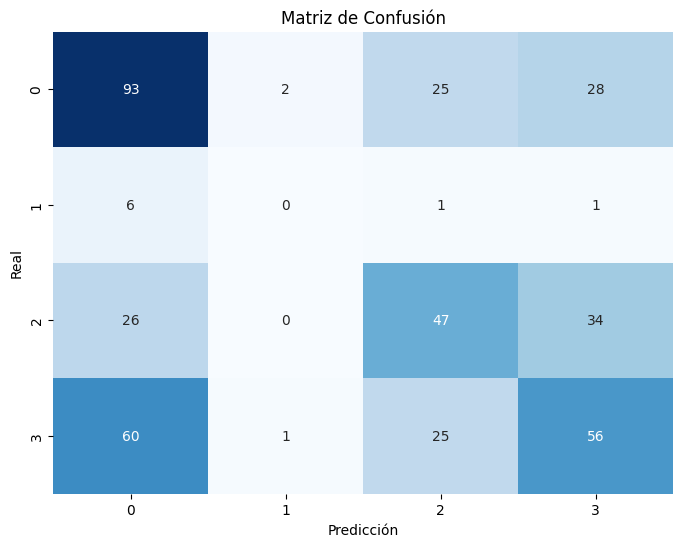

In [ ]:
# Calcular la matriz de confusión
conf_matrix_KNN = confusion_matrix(y_test_data, y_pred_KNN)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_KNN, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Supongamos que ya tienes la matriz de confusión conf_matrix_KNN

# Calcular precision, recall y F1 score a partir de la matriz de confusión
precision_KNN = precision_score(y_test_data, y_pred_KNN, average='weighted')
recall_KNN = recall_score(y_test_data, y_pred_KNN, average='weighted')
f1_score_KNN = f1_score(y_test_data, y_pred_KNN, average='weighted')

# Imprimir las métricas
print(f'Precision: {precision_KNN:.4f}')
print(f'Recall: {recall_KNN:.4f}')
print(f'F1 Score: {f1_score_KNN:.4f}')


Precision: 0.4754
Recall: 0.4840
F1 Score: 0.4757


In [ ]:
#CON PCA
# Crea y entrena tu modelo K-Nearest Neighbors con data_pca
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train_pca, y_train_pca)

# Realiza predicciones en el conjunto de prueba con data_pca
y_pred_KNN_pca = KNN_model.predict(X_test_pca)
Accuracy_KNN_pca = metrics.accuracy_score(y_test_pca, y_pred_KNN_pca)
print("KNN Accuracy (Data After PCA):", Accuracy_KNN_pca)

KNN Accuracy (Data After PCA): 0.44938271604938274


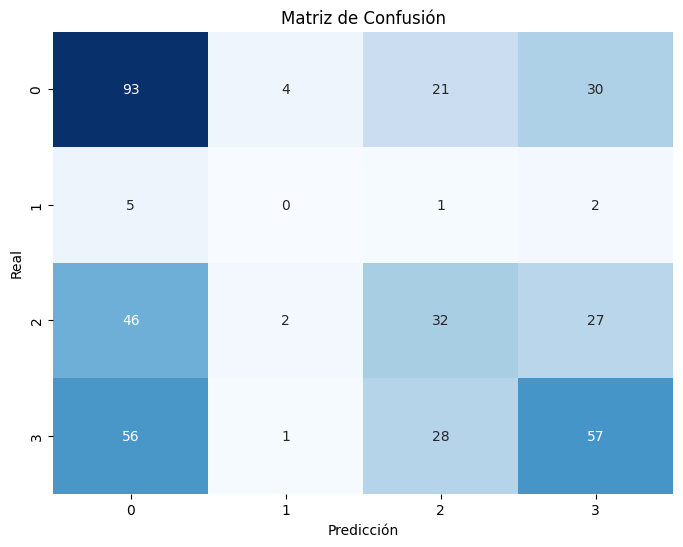

In [ ]:
# Calcular la matriz de confusión
conf_matrix_KNN_pca = confusion_matrix(y_test_pca, y_pred_KNN_pca)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_KNN_pca, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Supongamos que ya tienes la matriz de confusión conf_matrix_KNN_pca

# Calcular precision, recall y F1 score a partir de la matriz de confusión después de PCA
precision_KNN_pca = precision_score(y_test_pca, y_pred_KNN_pca, average='weighted')
recall_KNN_pca = recall_score(y_test_pca, y_pred_KNN_pca, average='weighted')
f1_score_KNN_pca = f1_score(y_test_pca, y_pred_KNN_pca, average='weighted')

# Imprimir las métricas después de PCA
print(f'Precision (After PCA): {precision_KNN_pca:.4f}')
print(f'Recall (After PCA): {recall_KNN_pca:.4f}')
print(f'F1 Score (After PCA): {f1_score_KNN_pca:.4f}')


Precision (After PCA): 0.4453
Recall (After PCA): 0.4494
F1 Score (After PCA): 0.4397


Regresion Logistica

In [ ]:
#SIN PCA
#LR_model = LogisticRegression(random_state=1234 , multi_class='multinomial', solver='newton-cg')
#LR_model = LR_model.fit(X_train_data, y_train_data)
#y_pred_LR = LR_model.predict(X_test_data)
#Accuracy_LR = metrics.accuracy_score(y_test_data, y_pred_LR)
#print("LR Accuracy:",Accuracy_LR)

In [ ]:
# Calcular la matriz de confusión
#conf_matrix_LR = confusion_matrix(y_test_data, y_pred_LR)

# Visualizar la matriz de confusión
#plt.figure(figsize=(8, 6))
#sns.heatmap(conf_matrix_LR, annot=True, fmt='d', cmap='Blues', cbar=False)
#plt.xlabel('Predicción')
#plt.ylabel('Real')
#plt.title('Matriz de Confusión')
#plt.show()

In [ ]:
#from sklearn.metrics import precision_score, recall_score, f1_score

# Calcular precision, recall y F1 score a partir de la matriz de confusión
#precision_LR = precision_score(y_test_data, y_pred_LR, average='weighted')
#recall_LR = recall_score(y_test_data, y_pred_LR, average='weighted')
#f1_score_LR = f1_score(y_test_data, y_pred_LR, average='weighted')

# Imprimir las métricas
#print(f'Precision: {precision_LR:.4f}')
#print(f'Recall: {recall_LR:.4f}')
#print(f'F1 Score: {f1_score_LR:.4f}')


In [ ]:
#CON PCA
# Crea y entrena tu modelo de Regresión Logística con data_pca
#LR_model_pca = LogisticRegression(random_state=1234, multi_class='multinomial', solver='newton-cg')
#LR_model_pca.fit(X_train_pca, y_train_pca)

# Realiza predicciones en el conjunto de prueba con data_pca
#y_pred_LR_pca = LR_model_pca.predict(X_test_pca)
#Accuracy_LR_pca = metrics.accuracy_score(y_test_pca, y_pred_LR_pca)
#print("LR Accuracy (Data After PCA):", Accuracy_LR_pca)

In [ ]:
# Calcular la matriz de confusión
#conf_matrix_LR_pca = confusion_matrix(y_test_pca, y_pred_LR_pca)

# Visualizar la matriz de confusión
#plt.figure(figsize=(8, 6))
#sns.heatmap(conf_matrix_LR_pca, annot=True, fmt='d', cmap='Blues', cbar=False)
#plt.xlabel('Predicción')
#plt.ylabel('Real')
#plt.title('Matriz de Confusión')
#plt.show()

In [ ]:
#from sklearn.metrics import precision_score, recall_score, f1_score

# Supongamos que ya tienes la matriz de confusión conf_matrix_LR_pca

# Calcular precision, recall y F1 score a partir de la matriz de confusión después de PCA
#precision_LR_pca = precision_score(y_test_pca, y_pred_LR_pca, average='weighted')
#recall_LR_pca = recall_score(y_test_pca, y_pred_LR_pca, average='weighted')
#f1_score_LR_pca = f1_score(y_test_pca, y_pred_LR_pca, average='weighted')

# Imprimir las métricas después de PCA
#print(f'Precision (After PCA): {precision_LR_pca:.4f}')
#print(f'Recall (After PCA): {recall_LR_pca:.4f}')
#print(f'F1 Score (After PCA): {f1_score_LR_pca:.4f}')


Comparacion de Resultados

In [ ]:
accuracy_list = [Accuracy_XGB, Accuracy_GBT, Accuracy_RF, Accuracy_GNB,
                 Accuracy_LDA, Accuracy_QDA, Accuracy_KNN, Accuracy_CatBoost]

model_list = ['XGBboost', 'Gradient Boosting', 'Random Forest',
             'Naive Bayes', 'Linear Discriminat', 'Quadratic Discriminat',
              'KNN', 'CatBoost_model']

df_accuracy = pd.DataFrame({'Model': model_list, 'Accuracy': accuracy_list})

accuracy_list_pca = [Accuracy_XGB_pca, Accuracy_GBT_pca, Accuracy_RF_pca, Accuracy_GNB_pca,
                 Accuracy_LDA_pca, Accuracy_QDA_pca, Accuracy_KNN_pca, Accuracy_CatBoost_pca]

model_list_pca = ['XGBboost', 'Gradient Boosting', 'Random Forest',
               'Naive Bayes', 'Linear Discriminat', 'Quadratic Discriminat',
              'KNN', 'CatBoost_model']

df_accuracy_pca = pd.DataFrame({'Model_pca': model_list_pca, 'Accuracy_pca': accuracy_list_pca})

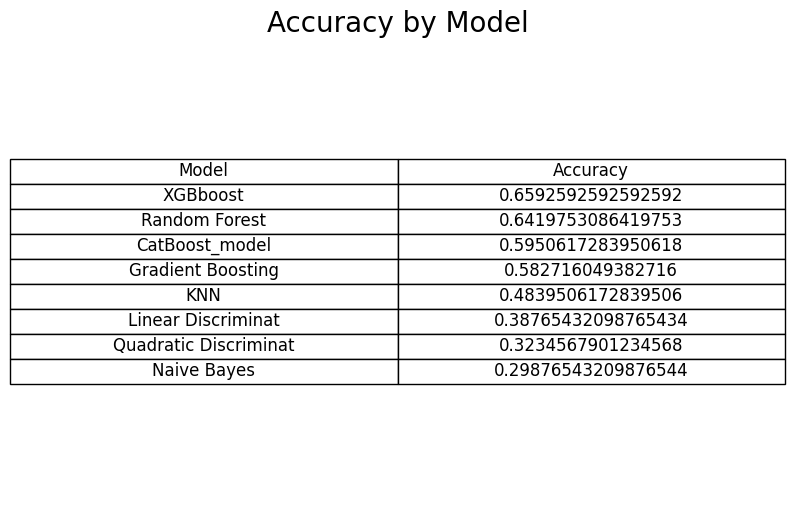

In [ ]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

# Tu código existente para ordenar y preparar los datos
order = list(df_accuracy.sort_values('Accuracy', ascending=False).Model)
df_accuracy = df_accuracy.sort_values('Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

# Crear una figura
plt.figure(figsize=(10, 6))

# Crear la tabla
table = plt.table(cellText=df_accuracy.values,
                  colLabels=df_accuracy.columns,
                  cellLoc = 'center', loc='center')

# Estilo de la tabla
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)  # Ajusta el tamaño de la tabla

# Oculta los ejes
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.axis('off')

plt.title("Accuracy by Model", fontsize=20)
plt.show()


<ipython-input-76-736ba02abddd>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value)


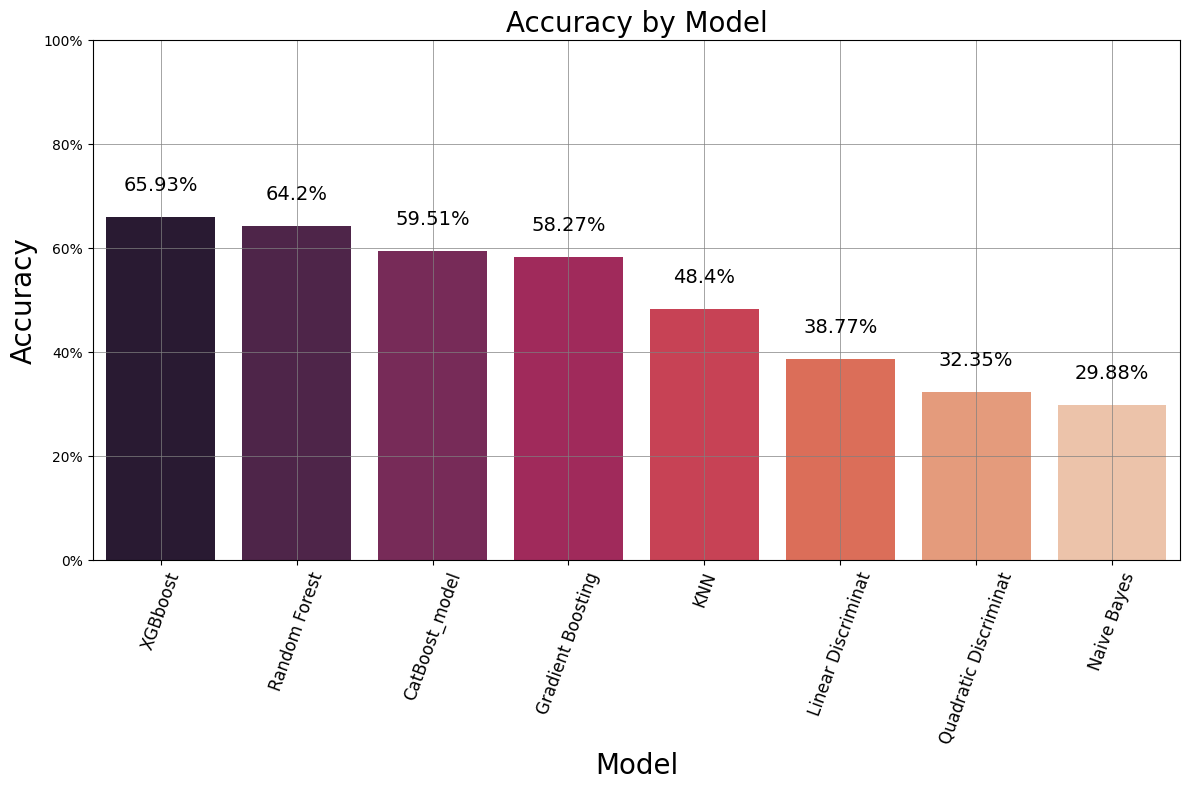

In [ ]:
import matplotlib.ticker as mtick  # Importa la biblioteca mtick
order = list(df_accuracy.sort_values('Accuracy', ascending=False).Model)
df_accuracy = df_accuracy.sort_values('Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

plt.figure(figsize=(12,8))
# make barplot and sort bars
x = sns.barplot(x='Model', y="Accuracy", data=df_accuracy, order = order, palette="rocket")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy by Model", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

for i in range(len(model_list)):
    plt.text(x = i, y = df_accuracy.loc[i, 'Accuracy'] + 0.05, s = str(round((df_accuracy.loc[i, 'Accuracy'])*100, 2))+'%',
             fontsize = 14, color='black',horizontalalignment='center')


y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

plt.tight_layout()

Comparativos con todas las variables antes de PCA y Despues de PCA

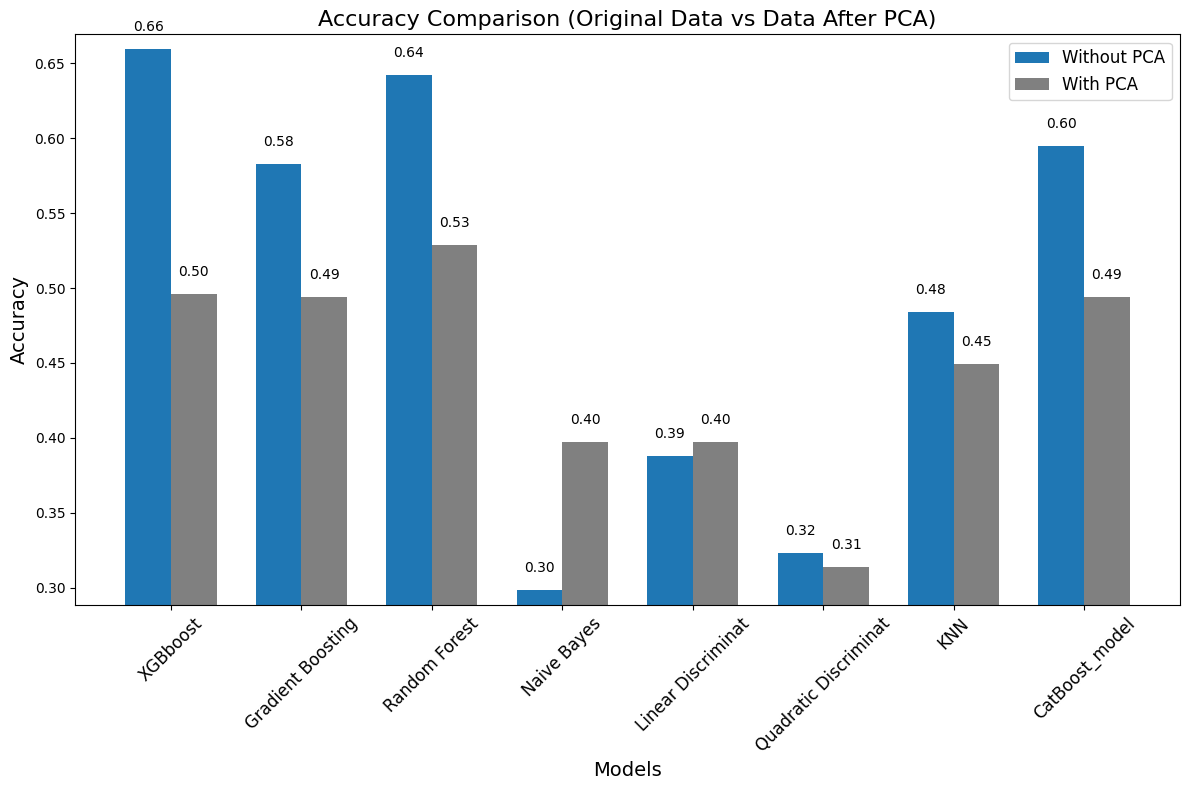

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
model_list = ['XGBboost', 'Gradient Boosting', 'Random Forest'
             , 'Naive Bayes', 'Linear Discriminat', 'Quadratic Discriminat',
              'KNN', 'CatBoost_model']

accuracy_list = [Accuracy_XGB, Accuracy_GBT, Accuracy_RF, Accuracy_GNB,
                 Accuracy_LDA, Accuracy_QDA, Accuracy_KNN, Accuracy_CatBoost]

accuracy_list_pca = [Accuracy_XGB_pca, Accuracy_GBT_pca, Accuracy_RF_pca, Accuracy_GNB_pca,
                 Accuracy_LDA_pca, Accuracy_QDA_pca, Accuracy_KNN_pca, Accuracy_CatBoost_pca]

# Definir colores para los modelos sin PCA y con PCA
colors = ['#1f77b4', '#808080']

# Configuración
bar_width = 0.35
index = np.arange(len(model_list))

# Crear la figura
plt.figure(figsize=(12, 8))

# Dibujar barras
bar1 = plt.bar(index, accuracy_list, bar_width, color=colors[0], label='Without PCA')
bar2 = plt.bar(index + bar_width, accuracy_list_pca, bar_width, color=colors[1], label='With PCA')

# Etiquetas de modelos en el eje X
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy Comparison (Original Data vs Data After PCA)', fontsize=16)
plt.xticks(index + bar_width / 2, model_list, rotation=45, fontsize=12)

# Añadir etiquetas numéricas a las barras
for bar, value in zip(bar1, accuracy_list):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

for bar, value in zip(bar2, accuracy_list_pca):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Ajustar la escala del eje Y para resaltar pequeñas diferencias
plt.ylim(min(min(accuracy_list), min(accuracy_list_pca)) - 0.01, max(max(accuracy_list), max(accuracy_list_pca)) + 0.01)

# Leyenda
plt.legend(fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Comparativo de todas las metricas

In [ ]:
model_list = ['XGBboost', 'Gradient Boosting', 'Random Forest',
               'Naive Bayes', 'Linear Discriminat', 'Quadratic Discriminat',
              'KNN', 'CatBoost']

accuracy_list = [Accuracy_XGB, Accuracy_GBT, Accuracy_RF, Accuracy_GNB,
                 Accuracy_LDA, Accuracy_QDA, Accuracy_KNN, Accuracy_CatBoost]

accuracy_list_pca = [Accuracy_XGB_pca, Accuracy_GBT_pca, Accuracy_RF_pca, Accuracy_GNB_pca,
                 Accuracy_LDA_pca, Accuracy_QDA_pca, Accuracy_KNN_pca, Accuracy_CatBoost_pca]

precision_list = [precision_XGB, precision_GBT, precision_RF, precision_GNB,
                  precision_LDA, precision_QDA, precision_KNN, precision_CatBoost]

recall_list = [recall_XGB, recall_GBT, recall_RF, recall_GNB,
               recall_LDA, recall_QDA, recall_KNN, recall_CatBoost]

f1_score_list = [f1_score_XGB, f1_score_GBT, f1_score_RF, f1_score_GNB,
                 f1_score_LDA, f1_score_QDA, f1_score_KNN, f1_score_CatBoost]

precision_list_pca = [precision_XGB_pca, precision_GBT_pca, precision_RF_pca, precision_GNB_pca,
                      precision_LDA_pca, precision_QDA_pca, precision_KNN_pca, precision_CatBoost_pca]

recall_list_pca = [recall_XGB_pca, recall_GBT_pca, recall_RF_pca, recall_GNB_pca,
                   recall_LDA_pca, recall_QDA_pca, recall_KNN_pca, recall_CatBoost_pca]

f1_score_list_pca = [f1_score_XGB_pca, f1_score_GBT_pca, f1_score_RF_pca, f1_score_GNB_pca,
                      f1_score_LDA_pca, f1_score_QDA_pca, f1_score_KNN_pca, f1_score_CatBoost_pca]


In [ ]:
import pandas as pd

# Crear el DataFrame para las métricas antes de PCA
df_metrics_before_pca = pd.DataFrame({
    'Model': model_list,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_score_list
})

# Crear el DataFrame para las métricas después de PCA
df_metrics_after_pca = pd.DataFrame({
    'Model PCA': model_list,
    'Accuracy PCA': accuracy_list_pca,
    'Precision PCA': precision_list_pca,
    'Recall PCA': recall_list_pca,
    'F1 Score PCA': f1_score_list_pca
})

# Fusionar ambos DataFrames en uno solo usando el nombre del modelo como clave
df_comparison = pd.merge(df_metrics_before_pca, df_metrics_after_pca, left_on='Model', right_on='Model PCA', suffixes=('_before_pca', '_after_pca'))

# Visualizar el DataFrame
print(df_comparison)


                   Model  Accuracy  Precision    Recall  F1 Score  \
0               XGBboost  0.659259   0.664691  0.659259  0.653031   
1      Gradient Boosting  0.582716   0.579719  0.582716  0.580077   
2          Random Forest  0.641975   0.637464  0.641975  0.634864   
3            Naive Bayes  0.298765   0.554475  0.298765  0.185342   
4     Linear Discriminat  0.387654   0.388873  0.387654  0.354834   
5  Quadratic Discriminat  0.323457   0.469347  0.323457  0.250069   
6                    KNN  0.483951   0.475407  0.483951  0.475716   
7               CatBoost  0.595062   0.589976  0.595062  0.589472   

               Model PCA  Accuracy PCA  Precision PCA  Recall PCA  \
0               XGBboost      0.496296       0.483351    0.496296   
1      Gradient Boosting      0.493827       0.485130    0.493827   
2          Random Forest      0.528395       0.514502    0.528395   
3            Naive Bayes      0.397531       0.494568    0.397531   
4     Linear Discriminat      0.3

Color Oscuro (colors_before_pca): Las barras de color oscuro representan las métricas de los modelos antes de aplicar PCA. Es decir, indican el rendimiento de los modelos utilizando los datos originales sin reducción de dimensionalidad.

Color Claro (colors_after_pca): Las barras de color claro representan las métricas de los modelos después de aplicar PCA. Muestran el rendimiento de los modelos cuando se utiliza la versión de los datos después de la reducción de dimensionalidad mediante PCA.

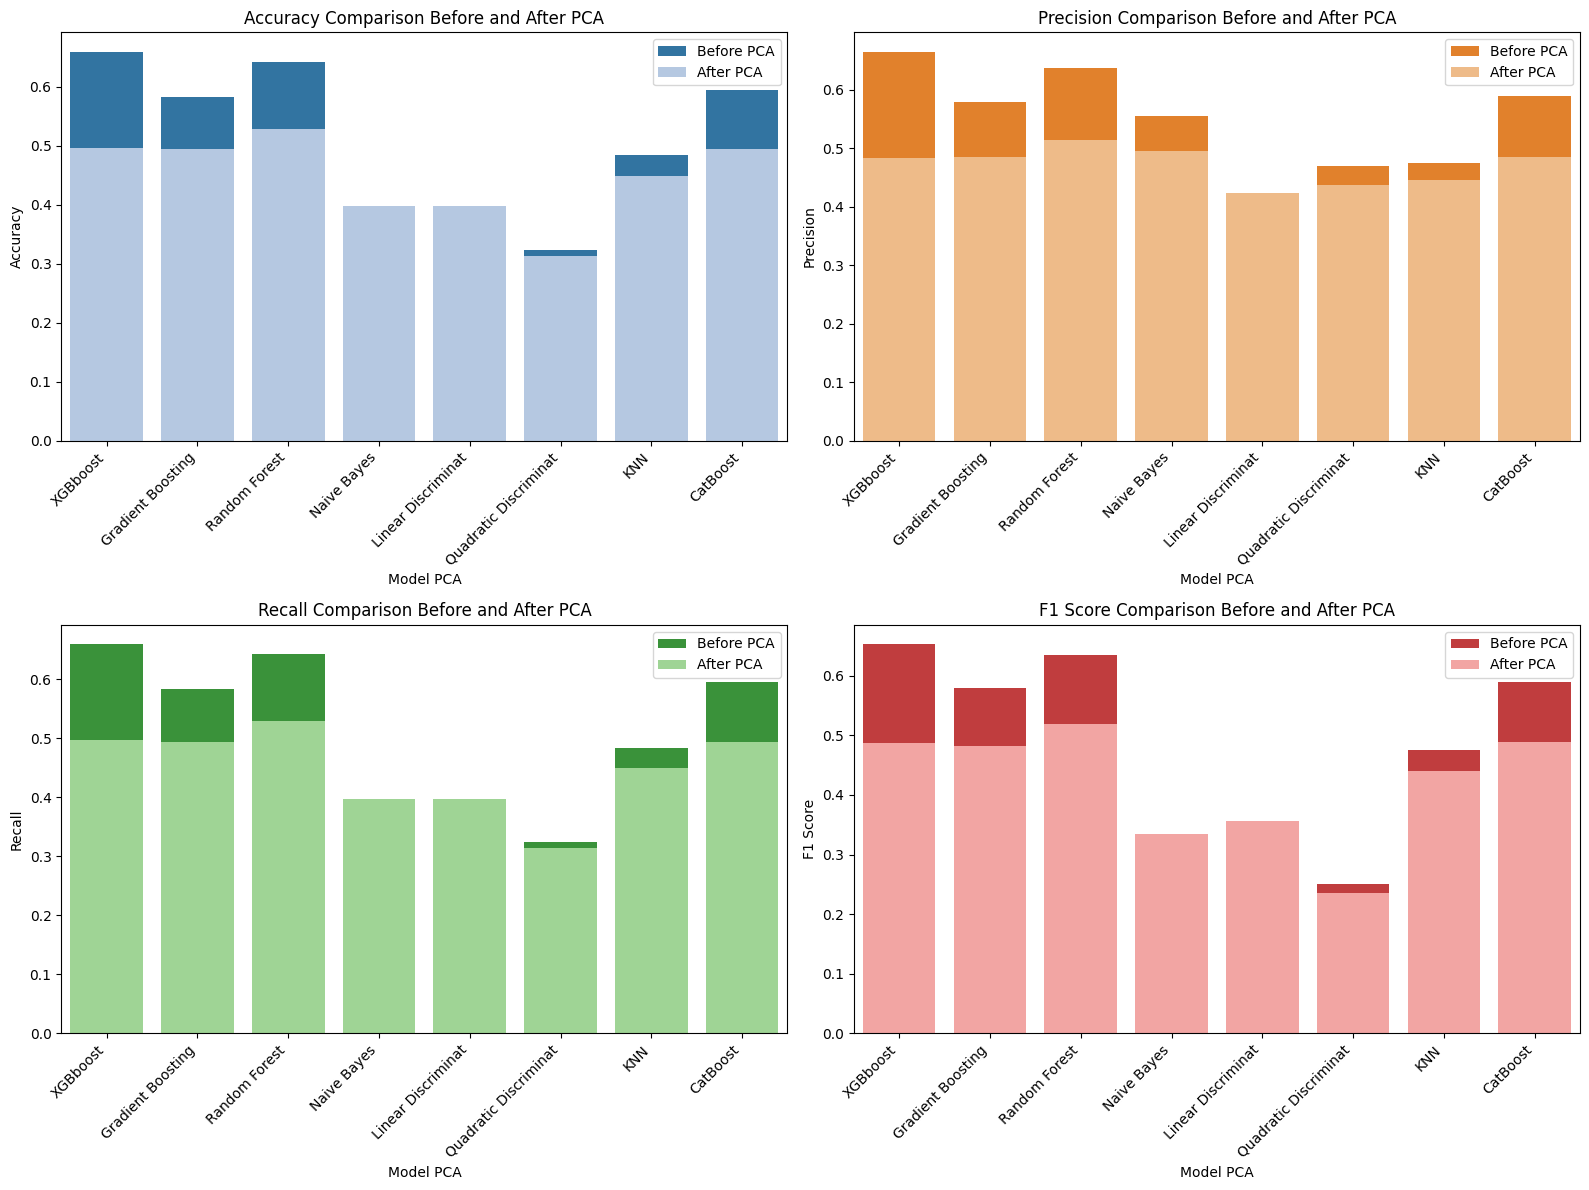

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de colores
colors_before_pca = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
colors_after_pca = ['#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5']

# Crear la figura con un tamaño más grande
plt.figure(figsize=(16, 12))

# Gráfico de barras agrupadas para Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=df_comparison, color=colors_before_pca[0], label='Before PCA')
sns.barplot(x='Model PCA', y='Accuracy PCA', data=df_comparison, color=colors_after_pca[0], label='After PCA')
plt.title('Accuracy Comparison Before and After PCA')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas para mejor legibilidad
plt.legend()  # Agregar leyenda

# Gráfico de barras agrupadas para Precision
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision', data=df_comparison, color=colors_before_pca[1], label='Before PCA')
sns.barplot(x='Model PCA', y='Precision PCA', data=df_comparison, color=colors_after_pca[1], label='After PCA')
plt.title('Precision Comparison Before and After PCA')
plt.ylabel('Precision')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Gráfico de barras agrupadas para Recall
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall', data=df_comparison, color=colors_before_pca[2], label='Before PCA')
sns.barplot(x='Model PCA', y='Recall PCA', data=df_comparison, color=colors_after_pca[2], label='After PCA')
plt.title('Recall Comparison Before and After PCA')
plt.ylabel('Recall')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Gráfico de barras agrupadas para F1 Score
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1 Score', data=df_comparison, color=colors_before_pca[3], label='Before PCA')
sns.barplot(x='Model PCA', y='F1 Score PCA', data=df_comparison, color=colors_after_pca[3], label='After PCA')
plt.title('F1 Score Comparison Before and After PCA')
plt.ylabel('F1 Score')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Ajustes de diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()
